In [ ]:
!echo "deb http://downloads.skewed.de/apt jammy main" >> /etc/apt/sources.list
!apt-key adv --keyserver keyserver.ubuntu.com --recv-key 612DEFB798507F25
!apt-get update
!apt-get install python3-graph-tool python3-matplotlib python3-cairo

In [ ]:
!apt purge python3-cairo
!apt install libcairo2-dev pkg-config python3-dev
!pip install --force-reinstall pycairo
!pip install zstandard

In [ ]:
from graph_tool.all import *

In [ ]:
!git clone https://github.com/eXascaleInfolab/LFR-Benchmark_UndirWeightOvp.git

In [ ]:
!cd LFR-Benchmark_UndirWeightOvp; make

In [1]:
## Generate multiple weighted graphs using weighted-LFR model
import numpy as np
import scipy as sp
import networkx as nx
from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42

import matplotlib.pyplot as plt
import itertools

def subps(nrows,ncols,rowsz=3,colsz=4,axlist=False):

    f,axes = plt.subplots(nrows,ncols,figsize=(ncols*colsz,nrows*rowsz))
    if axlist and ncols*nrows == 1:
        axes = [axes]
    return f,axes


def nxG_to_npA(G,labels=None):
    A = nx.to_numpy_array(G)
    ix = np.argsort(G.nodes())
    A = A[ix][:,ix]
    # if labels is not None:
    #     cix = np.argsort(labels)
    #     A = A[cix][:,cix]
    #     labels = labels[cix]
    return A, labels

import subprocess

pathtoprog = 'LFR-Benchmark_UndirWeightOvp'

seed = 13
NREPS = 10
params = {


            #VARYING BETA
          (0,seed):{'-N': 125, '-k': 25, '-maxk': 100, '-muw': 0.5, '-mut': 0.5, '-beta': .5, '-t1': 2, '-t2': 1},
          (1,seed):{'-N': 125, '-k': 25, '-maxk': 100, '-muw': 0.5, '-mut': 0.5, '-beta': 1, '-t1': 2, '-t2': 1},
          (2,seed):{'-N': 125, '-k': 25, '-maxk': 100, '-muw': 0.5, '-mut': 0.5, '-beta': 2, '-t1': 2, '-t2': 1},
          #   #VARYING MUT
          (3,seed):{'-N': 125, '-k': 25, '-maxk': 100, '-muw': 0.5, '-mut': 0.25, '-beta': 2, '-t1': 2, '-t2': 1},
          (4,seed+NREPS):{'-N': 125, '-k': 25, '-maxk': 100, '-muw': 0.5, '-mut': 0.5, '-beta': 2, '-t1': 2, '-t2': 1},
          (5,seed):{'-N': 125, '-k': 25, '-maxk': 100, '-muw': 0.5, '-mut': 0.75, '-beta': 2, '-t1': 2, '-t2': 1},
            #VARYING k
          (6,seed):{'-N': 125, '-k': 10, '-maxk': 100, '-muw': 0.5, '-mut': 0.5, '-beta': 2, '-t1': 2, '-t2': 1},
            #VARYING MUW
          (7,seed):{'-N': 125, '-k': 25, '-maxk': 100, '-muw': 0.25, '-mut': 0.5, '-beta': 2, '-t1': 2, '-t2': 1},
          (8,seed):{'-N': 125, '-k': 25, '-maxk': 100, '-muw': 0.75, '-mut': 0.5, '-beta': 2, '-t1': 2, '-t2': 1},

}


Gs = []
to_plot = []
for (pi,seed) in sorted(params.keys()):
    paramsi = params[(pi,seed)]
    for i in range(NREPS):
        seed_ = seed + i
        print('seed',seed_)
        with open('seed.txt', 'w') as f:
            f.write(str(seed_))

        params_list = list(itertools.chain.from_iterable([[k,str(v)] for k,v in paramsi.items()]))


        subprocess.run([f"./{pathtoprog}/lfrbench_udwov"] + params_list)


        #load generated graph
        G = nx.read_weighted_edgelist('network.dat',nodetype=int,)

        comm_labels = np.loadtxt('community.dat', dtype=int, usecols=1) - 1
        A, y = nxG_to_npA(G, comm_labels)
        G = nx.from_numpy_array(A)
        
        if i == 0:
            cix = np.argsort(y)
            A_sorted = A[cix][:,cix]
            to_plot.append(A_sorted) 

        Gs.append((G, y))

seed 13
setting... -N 125
setting... -k 25
setting... -maxk 100
setting... -muw 0.5
setting... -mut 0.5
setting... -beta 0.5
setting... -t1 2
setting... -t2 1

**************************************************************
network:	network.dat
number of nodes:	125
average degree:	25
maximum degree:	100
exponent for the degree distribution:	2
exponent for the community size distribution:	1
mixing parameter(topology):	0.5
mixing parameter (weights):	0.5
beta exponent:	0.5
number of overlapping nodes:	0
number of memberships of the overlapping nodes:	0
compact communities output format (NMI eval compatible):	0
**************************************************************

-----------------------------------------------------------
community size range automatically set equal to [10 , 100]
building communities... 
connecting communities... 
inserting weights...
recording network...


---------------------------------------------------------------------------
network of 125 vertices and 16

-----------------------------------------------------------
community size range automatically set equal to [10 , 100]
building communities... 
connecting communities... 
inserting weights...
recording network...


---------------------------------------------------------------------------
network of 125 vertices and 1505 edges;	 average degree = 24.08

average mixing parameter (topology): 0.443931 +/- 0.0817616
p_in: 0.22923	p_out: 0.171733

average mixing parameter (weights): 0.487329 +/- 0.0533005
average weight of an internal link 0.169131 +/- 0.114558
average weight of an external link 0.221717 +/- 0.109156


seed 21
setting... -N 125
setting... -k 25
setting... -maxk 100
setting... -muw 0.5
setting... -mut 0.5
setting... -beta 0.5
setting... -t1 2
setting... -t2 1

**************************************************************
network:	network.dat
number of nodes:	125
average degree:	25
maximum degree:	100
exponent for the degree distribution:	2
exponent for the community size di

connecting communities... 
inserting weights...
recording network...


---------------------------------------------------------------------------
network of 125 vertices and 1409 edges;	 average degree = 22.544

average mixing parameter (topology): 0.501681 +/- 0.0236963
p_in: 0.412458	p_out: 0.117805

average mixing parameter (weights): 0.500062 +/- 0
average weight of an internal link 1.00356 +/- 0.0546551
average weight of an external link 0.996664 +/- 0.0536241


seed 18
setting... -N 125
setting... -k 25
setting... -maxk 100
setting... -muw 0.5
setting... -mut 0.5
setting... -beta 1
setting... -t1 2
setting... -t2 1

**************************************************************
network:	network.dat
number of nodes:	125
average degree:	25
maximum degree:	100
exponent for the degree distribution:	2
exponent for the community size distribution:	1
mixing parameter(topology):	0.5
mixing parameter (weights):	0.5
beta exponent:	1
number of overlapping nodes:	0
number of memberships of 

setting... -N 125
setting... -k 25
setting... -maxk 100
setting... -muw 0.5
setting... -mut 0.5
setting... -beta 2
setting... -t1 2
setting... -t2 1

**************************************************************
network:	network.dat
number of nodes:	125
average degree:	25
maximum degree:	100
exponent for the degree distribution:	2
exponent for the community size distribution:	1
mixing parameter(topology):	0.5
mixing parameter (weights):	0.5
beta exponent:	2
number of overlapping nodes:	0
number of memberships of the overlapping nodes:	0
compact communities output format (NMI eval compatible):	0
**************************************************************

-----------------------------------------------------------
community size range automatically set equal to [10 , 100]
building communities... 
connecting communities... 
inserting weights...
recording network...


---------------------------------------------------------------------------
network of 125 vertices and 1510 edges;	 a



---------------------------------------------------------------------------
network of 125 vertices and 1570 edges;	 average degree = 25.12

average mixing parameter (topology): 0.500162 +/- 0.0207752
p_in: 0.305497	p_out: 0.149949

average mixing parameter (weights): 0.508081 +/- 0.12645
average weight of an internal link 38.4424 +/- 54.8401
average weight of an external link 40.3832 +/- 44.9338


seed 13
setting... -N 125
setting... -k 25
setting... -maxk 100
setting... -muw 0.5
setting... -mut 0.25
setting... -beta 2
setting... -t1 2
setting... -t2 1

**************************************************************
network:	network.dat
number of nodes:	125
average degree:	25
maximum degree:	100
exponent for the degree distribution:	2
exponent for the community size distribution:	1
mixing parameter(topology):	0.25
mixing parameter (weights):	0.5
beta exponent:	2
number of overlapping nodes:	0
number of memberships of the overlapping nodes:	0
compact communities output format (NMI eva

setting... -N 125
setting... -k 25
setting... -maxk 100
setting... -muw 0.5
setting... -mut 0.25
setting... -beta 2
setting... -t1 2
setting... -t2 1

**************************************************************
network:	network.dat
number of nodes:	125
average degree:	25
maximum degree:	100
exponent for the degree distribution:	2
exponent for the community size distribution:	1
mixing parameter(topology):	0.25
mixing parameter (weights):	0.5
beta exponent:	2
number of overlapping nodes:	0
number of memberships of the overlapping nodes:	0
compact communities output format (NMI eval compatible):	0
**************************************************************

-----------------------------------------------------------
community size range automatically set equal to [10 , 100]
building communities... 
connecting communities... 
inserting weights...
recording network...


---------------------------------------------------------------------------
network of 125 vertices and 1409 edges;	

-----------------------------------------------------------
community size range automatically set equal to [10 , 100]
building communities... 
connecting communities... 
inserting weights...
recording network...


---------------------------------------------------------------------------
network of 125 vertices and 1433 edges;	 average degree = 22.928

average mixing parameter (topology): 0 +/- 0
p_in: 0.184903	p_out: 0

average mixing parameter (weights): 0 +/- 0
average weight of an internal link 17.8061 +/- 12.5747
average weight of an external link 0 +/- 0
seed 28
setting... -N 125
setting... -k 25
setting... -maxk 100
setting... -muw 0.5
setting... -mut 0.5
setting... -beta 2
setting... -t1 2
setting... -t2 1

**************************************************************
network:	network.dat
number of nodes:	125
average degree:	25
maximum degree:	100
exponent for the degree distribution:	2
exponent for the community size distribution:	1
mixing parameter(topology):	0.5
mixing pa

seed 14
setting... -N 125
setting... -k 25
setting... -maxk 100
setting... -muw 0.5
setting... -mut 0.75
setting... -beta 2
setting... -t1 2
setting... -t2 1

**************************************************************
network:	network.dat
number of nodes:	125
average degree:	25
maximum degree:	100
exponent for the degree distribution:	2
exponent for the community size distribution:	1
mixing parameter(topology):	0.75
mixing parameter (weights):	0.5
beta exponent:	2
number of overlapping nodes:	0
number of memberships of the overlapping nodes:	0
compact communities output format (NMI eval compatible):	0
**************************************************************

-----------------------------------------------------------
community size range automatically set equal to [10 , 100]
building communities... 
connecting communities... 
inserting weights...
recording network...


---------------------------------------------------------------------------
network of 125 vertices and 1348

connecting communities... 
inserting weights...
recording network...


---------------------------------------------------------------------------
network of 125 vertices and 1547 edges;	 average degree = 24.752

average mixing parameter (topology): 0.638127 +/- 0.121613
p_in: 0.147892	p_out: 0.26142

average mixing parameter (weights): 0.472523 +/- 0.0922752
average weight of an internal link 49.0372 +/- 55.4512
average weight of an external link 30.4957 +/- 41.3647


seed 21
setting... -N 125
setting... -k 25
setting... -maxk 100
setting... -muw 0.5
setting... -mut 0.75
setting... -beta 2
setting... -t1 2
setting... -t2 1

**************************************************************
network:	network.dat
number of nodes:	125
average degree:	25
maximum degree:	100
exponent for the degree distribution:	2
exponent for the community size distribution:	1
mixing parameter(topology):	0.75
mixing parameter (weights):	0.5
beta exponent:	2
number of overlapping nodes:	0
number of memberships 

connecting communities... 
inserting weights...
recording network...


---------------------------------------------------------------------------
network of 125 vertices and 487 edges;	 average degree = 7.792

average mixing parameter (topology): 0.488751 +/- 0.103285
p_in: 0.10826	p_out: 0.0477618

average mixing parameter (weights): 0.529783 +/- 0.169504
average weight of an internal link 20.4441 +/- 34.8063
average weight of an external link 21.3917 +/- 27.9531


seed 20
setting... -N 125
setting... -k 10
setting... -maxk 100
setting... -muw 0.5
setting... -mut 0.5
setting... -beta 2
setting... -t1 2
setting... -t2 1

**************************************************************
network:	network.dat
number of nodes:	125
average degree:	10
maximum degree:	100
exponent for the degree distribution:	2
exponent for the community size distribution:	1
mixing parameter(topology):	0.5
mixing parameter (weights):	0.5
beta exponent:	2
number of overlapping nodes:	0
number of memberships of t

inserting weights...
recording network...


---------------------------------------------------------------------------
network of 125 vertices and 1580 edges;	 average degree = 25.28

average mixing parameter (topology): 0.492282 +/- 0.028755
p_in: 0.209426	p_out: 0.198413

average mixing parameter (weights): 0.250192 +/- 0.0114112
average weight of an internal link 56.8083 +/- 71.0505
average weight of an external link 19.6854 +/- 24.4442


seed 17
setting... -N 125
setting... -k 25
setting... -maxk 100
setting... -muw 0.25
setting... -mut 0.5
setting... -beta 2
setting... -t1 2
setting... -t2 1

**************************************************************
network:	network.dat
number of nodes:	125
average degree:	25
maximum degree:	100
exponent for the degree distribution:	2
exponent for the community size distribution:	1
mixing parameter(topology):	0.5
mixing parameter (weights):	0.25
beta exponent:	2
number of overlapping nodes:	0
number of memberships of the overlapping nodes:	0

connecting communities... 
inserting weights...
recording network...


---------------------------------------------------------------------------
network of 125 vertices and 1628 edges;	 average degree = 26.048

average mixing parameter (topology): 0.485342 +/- 0.0346412
p_in: 0.225393	p_out: 0.199795

average mixing parameter (weights): 0.751911 +/- 0.0970589
average weight of an internal link 19.0171 +/- 20.7171
average weight of an external link 66.8048 +/- 59.6965


seed 14
setting... -N 125
setting... -k 25
setting... -maxk 100
setting... -muw 0.75
setting... -mut 0.5
setting... -beta 2
setting... -t1 2
setting... -t2 1

**************************************************************
network:	network.dat
number of nodes:	125
average degree:	25
maximum degree:	100
exponent for the degree distribution:	2
exponent for the community size distribution:	1
mixing parameter(topology):	0.5
mixing parameter (weights):	0.75
beta exponent:	2
number of overlapping nodes:	0
number of membership

inserting weights...
recording network...


---------------------------------------------------------------------------
network of 125 vertices and 1505 edges;	 average degree = 24.08

average mixing parameter (topology): 0.443931 +/- 0.0817616
p_in: 0.22923	p_out: 0.171733

average mixing parameter (weights): 0.74593 +/- 0.0284744
average weight of an internal link 15.758 +/- 21.3574
average weight of an external link 63.2137 +/- 77.1015


seed 21
setting... -N 125
setting... -k 25
setting... -maxk 100
setting... -muw 0.75
setting... -mut 0.5
setting... -beta 2
setting... -t1 2
setting... -t2 1

**************************************************************
network:	network.dat
number of nodes:	125
average degree:	25
maximum degree:	100
exponent for the degree distribution:	2
exponent for the community size distribution:	1
mixing parameter(topology):	0.5
mixing parameter (weights):	0.75
beta exponent:	2
number of overlapping nodes:	0
number of memberships of the overlapping nodes:	0
c

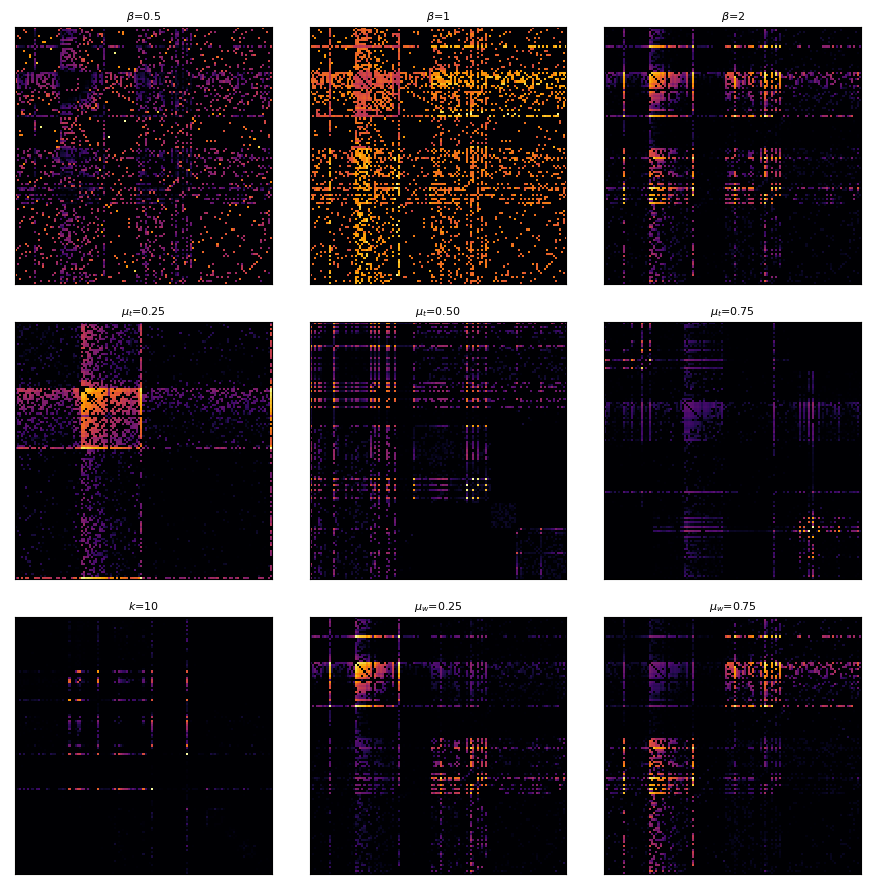

In [2]:
f, axes = subps(3,3,3,3)
titles = [
          r'$\beta$=0.5', r'$\beta$=1', r'$\beta$=2',
         r'$\mu_t$=0.25', r'$\mu_t$=0.50', r'$\mu_t$=0.75',
         r'$k$=10', r'$\mu_w$=0.25', r'$\mu_w$=0.75',
         ]
for pi, A in enumerate(to_plot):
    ax = axes.ravel()[pi]
    ax.matshow(A,cmap='inferno')
    ax.set(xticks=[], yticks=[])
    ax.set_title(titles[pi],size=8)

f.tight_layout()

plt.show()

In [ ]:
import graph_tool.all as gt
from sklearn.metrics.cluster import normalized_mutual_info_score
import time
seed = 13

test_non_deg_corr = True
verbose = False
show_plot = False
doMCMC = False


num_nets = len(Gs)
all_means = []
for ii in range(9):
    print('\n*****',ii)
    nmis = []
    tot_times = []
    for jj in range(NREPS):

        gi = ii*NREPS + jj

        G, labels = Gs[gi]
        if np.all(labels == 0):
            continue


        #save graph to xml format, for loading with graph-tool
        path = "tempG.xml"
        nx.write_graphml_xml(G, path)
        #load pre-saved xml graph
        g = gt.load_graph(path)

        #convert graph to undirected: mirror all its edges
        g.set_directed(True)
        m = g.edge_properties["weight"].a.size
        edge_list = list(g.edges())
        assert len(edge_list) == m

        for ei0 in range(m):
            s,t = g.vertex_index[edge_list[ei0].source()], g.vertex_index[edge_list[ei0].target()]
            assert g.edge(t,s) is None#v-u not already in
            g.add_edge(g.vertex(t), g.vertex(s))
            g.edge_properties["weight"].a[m+ei0] = g.edge_properties["weight"].a[ei0]
        g.set_directed(False)


        np.random.seed(seed)
        gt.seed_rng(seed)

        start = time.time()
        state_dc = gt.minimize_nested_blockmodel_dl(g, state_args=dict(deg_corr=True,recs=[g.ep.weight],rec_types=["real-exponential"]))
        dc_time = time.time() - start
        if test_non_deg_corr:
            start = time.time()
            state_ndc = gt.minimize_nested_blockmodel_dl(g, state_args=dict(deg_corr=False,recs=[g.ep.weight],rec_types=["real-exponential"]))
            ndc_time = time.time() - start


        if verbose: print("  Degree-corrected DL:\t", state_dc.entropy())
        if test_non_deg_corr:
            if verbose: print("  Non-degree-corrected DL:\t", state_ndc.entropy())
            delta = state_ndc.entropy() - state_dc.entropy()
            if verbose: print(u"  ln \u039b:\t\t\t", delta)

            if delta > 0: #state_ndc DL > state_dc DL
                if verbose: print('  Using degree-corrected model')
                state = state_dc
                tot_time = dc_time
            else:
                if verbose:  print('  Using non-degree-corrected model')
                state = state_ndc
                tot_time = ndc_time
        else:
            if verbose: print('  Using degree-corrected model')
            state = state_dc


        # https://graph-tool.skewed.de/static/doc/demos/inference/inference.html#edge-weights-and-covariates


        # improve solution with merge-split
        if doMCMC:
            start = time.time()
            S1 = state.entropy()
            print('    ',end='')
            for i in range(100):
                if i % 10 == 0:
                    print(i,end=' ',flush=1)
                dS, nattempts, nmoves = state.multiflip_mcmc_sweep(beta=np.inf, niter=10)

            S2 = state.entropy()
            if verbose: print(" Improvement:", S2 - S1)
            tot_time += time.time() - start


        N = len(G)
        mylevels = []
        ys = []
        for si,s in enumerate(state.get_levels()):
            if state.get_levels()[si+1].get_N() in [1, s.get_N()]:
                break
            mylevels.append(s)
            ys.append(np.zeros(N))


        for ni in range(N):
            r = ni
            for li in range(len(mylevels)):
                r = mylevels[li].get_blocks()[r]
                ys[li][ni] = r
        if show_plot:
            f, axes = subps(1,len(ys)+1)
            axes[0].matshow(A)
            axes[0].set_title(f'Ground truth ({n_comms} comms.)')

        n_comms = np.unique(labels).size

        best_nmi = 0
        for yi, y in enumerate(ys):
            nmi = normalized_mutual_info_score(labels,y)
            ix = np.argsort(y)
            n_comms = np.unique(y).size
            best_nmi = max(best_nmi, nmi)
            if show_plot:
                axes[yi+1].matshow(A[ix][:,ix])
                axes[yi+1].set_title(f'NMI = {nmi:.4f} ({n_comms} comms.)')
        nmi = best_nmi


        nmis.append(nmi)
        tot_times.append(tot_time)
        
        if show_plot:
            plt.show()
    print(f'Network {ii+1}/{len(Gs)//NREPS}: mean NMI = {np.mean(nmis):.4f} & Time = {np.mean(tot_times):.2f}')
    all_means.append(np.mean(nmis))

In [ ]:
!pip install pycombo
!pip install leidenalg
!pip install cdlib

In [ ]:
from cdlib import algorithms
from sklearn.metrics.cluster import normalized_mutual_info_score
seed = 13
np.random.seed(seed)

method = 'louvain'
method_ftns = {'asymp_suprise':algorithms.surprise_communities,
               'combo':algorithms.pycombo, 'louvain':algorithms.louvain, }

def NMI(true_labels, part2):
    n = true_labels.size
    pred = np.zeros(n)

    for label, comm in enumerate(coms.communities):
        for v in comm:
            pred[v] = label
    return normalized_mutual_info_score(true_labels, pred)

all_means = []

print('METHOD',method)
for ii in range(9):
    print('\n*****',ii)
    nmis = []
    tot_times = []
    for jj in range(NREPS):

        gi = ii*NREPS + jj

        G, labels = Gs[gi]
        if np.all(labels == 0):
            continue
        if method == 'combo':
            coms = method_ftns[method](G, random_seed=seed)
        else: coms = method_ftns[method](G)
        nmi = NMI(labels, coms.communities)
        
        nmis.append(nmi)

    all_means.append(np.mean(nmis))
    print(ii,all_means[-1])

In [ ]:
!pip install karateclub

In [ ]:
from karateclub import NNSED
from sklearn.metrics.cluster import normalized_mutual_info_score
nnsed = NNSED()
show_plot = False
num_nets = len(Gs)
all_means = []
for ii in range(9):
    print('\n*****',ii)
    nmis = []
    tot_times = []
    for jj in range(NREPS):
        gi = ii*NREPS + jj

        G, labels = Gs[gi]
        if np.all(labels == 0):
            continue

        #convert to a graph and labels sorted by node community
        A = nx.to_numpy_array(G)
        ix = np.argsort(G.nodes())
        A = A[ix][:,ix]
        if labels is not None:
            labels = np.array([labels[n] for n in sorted(G.nodes())])
            cix = np.argsort(labels)
            A = A[cix][:,cix]
            labels = labels[cix]
        if show_plot:
            f, (ax0,ax1,ax2) = subps(1,3)
            ax0.matshow(A)
        G = nx.from_numpy_array(A,)

        nnsed.fit(G)
        y = nnsed.get_memberships()
        y = np.array([y[n] for n in sorted(G.nodes())])
        cix = np.argsort(y)
        A = A[cix][:,cix]
        y = y[cix]
        nmi = normalized_mutual_info_score(labels,y)

        if show_plot:
            ax2.matshow(A)

        nmis.append(nmi)

        
        if show_plot:
            plt.show()
    print(f'Network {ii+1}/{len(Gs)//NREPS}: mean NMI = {np.mean(nmis):.4f}')
    all_means.append(np.mean(nmis))
all_means

For benchmarking GNNS, we used the notebook provided at: https://github.com/Alexander-Belyi/GNNS